$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Classification with Nonlinear Logistic Regression Using Neural Networks

12.1: *Replaced note that mentioned `objectiveF` with note mentioning `error_f`.*

## Motivation and Setup

Linear function approximator as a neural network.

<img src="http://www.cs.colostate.edu/~anderson/cs445/notebooks/nnlinear.png">

What must we add to do logistic regression?

Just add the softmax calculation to the output layer. 

<img src="http://www.cs.colostate.edu/~anderson/cs445/notebooks/nnlinearlogisticregression.png">

Any thoughts on how to do nonlinear logistic regression?

<img src="http://www.cs.colostate.edu/~anderson/cs445/notebooks/nntwolayerlogisticregression.png">


## Derivation

We will maximize the log likelihood of the training data.
$$
  \begin{align*}
    L(\Wv) & = \left ( \prod_{n=1}^N \prod_{k=1}^K P(C=k|\xv_n)^{t_{n,k}} \right ) \\
    \log L(\Wv) & = LL(\Wv) =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log P(C=k|\xv_n)\\
     & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_{n,k}
   \end{align*}
$$

## Gradient of the Log Likelihood

$$
      \begin{align*}
        LL(\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k}
      \log g_{n,k}\;\;\;\;\; \text{ where } g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^K \eby{m}}; \\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        \end{align*}
$$



## Linear Version

General gradient

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

For linear logistic regression, $y_{n,j} = \xv_n^T \Wv_{*,j}$, so $\frac{\partial y_{n,k}}{\partial \Wv_{d,j}}$ exists only when $j=k$, so

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N (t_{n,j} - g_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{d,j}}\\
         & =  \sum_{n=1}^N \left ( t_{n,j} - g_{n,j} \right ) \xv_{d,j}
      \end{align*}
$$

## Nonlinear Version

First the general form again.

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

Now $y_{n,j}$ depends on $\Vv$ and $\Wv$, so

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & = \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


But, thank goodness, we have already calculated $\frac{\partial y_{n,k}}{\partial \Vv_{d,m}}$ and 
$\frac{\partial y_{n,k}}{\partial \Wv_{m,k}}$ in our previous neural network lectures.  This becomes more clear when we compare above with the derivatives of
mean squared error with respect to weights for neural networks for regression problems.

$$
      \begin{align*}
      E &= \frac{1}{NK}  \frac{1}{2} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial \Vv_{d,m}} & = - \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N  (t_{n,j} - y_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Compare to gradients for likelihood

$$
      \begin{align*}
        LL(\Vv,\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log
        g_{n,k} \text{ where }  g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


So, our previously derived matrix expressions for neural networks can
be used if we modify the output calculation.  Here are the expressions
we used for minimizing mean squared error:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

## Two-Dimensional Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

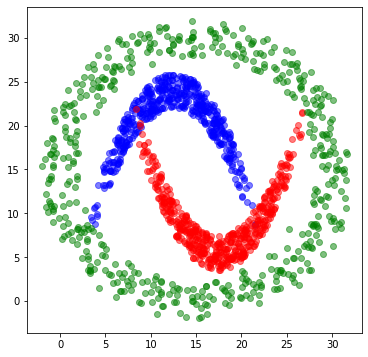

In [2]:
n = 500
x1 = np.linspace(5, 20, n) + np.random.uniform(-2, 2, n)
y1 = ((20-12.5)**2-(x1-12.5)**2) / (20-12.5)**2 * 10 + 14 + np.random.uniform(-2, 2, n)
x2 = np.linspace(10, 25, n) + np.random.uniform(-2, 2, n)
y2 = ((x2-17.5)**2) / (25-17.5)**2 * 10 + 5.5 + np.random.uniform(-2, 2, n)
angles = np.linspace(0, 2*np.pi, n)
x3 = np.cos(angles) * 15 + 15 + np.random.uniform(-2, 2, n)
y3 = np.sin(angles) * 15 + 15 + np.random.uniform(-2, 2, n)
X =  np.vstack((np.hstack((x1, x2, x3)),  np.hstack((y1, y2, y3)))).T
T = np.repeat(range(1, 4), n).reshape((-1, 1))
colors = ['blue', 'red', 'green']
plt.figure(figsize=(6, 6))
for c in range(1, 4):
    mask = (T == c).flatten()
    plt.plot(X[mask, 0], X[mask, 1], 'o', markersize=6,  alpha=0.5,  color=colors[c-1])

Let's try to classify this data with a 5 hidden unit neural network with nonlinear logistic regression.  In Python, do this by defining a new class `NeuralNetworkClassifier` it is easy to create a new class for using a neural network
as a classifier by making a subclass`*NeuralNetworkClassifier` of the
`NeuralNetwork` and make the required changes.  Most of the changes will be in `error_f`, `gradient_f`, `train` and `use` methods.

In [3]:
import neuralnetworks as nn  # from solution to A4

In [4]:
# import sys
# sys.path = ['.'] + sys.path

sgd: Epoch 2000 Error=0.78911
sgd: Epoch 4000 Error=0.87490
sgd: Epoch 6000 Error=0.90023
sgd: Epoch 8000 Error=0.90956
sgd: Epoch 10000 Error=0.91550
sgd: Epoch 12000 Error=0.92012
sgd: Epoch 14000 Error=0.92412
sgd: Epoch 16000 Error=0.92753
sgd: Epoch 18000 Error=0.93027
sgd: Epoch 20000 Error=0.93243


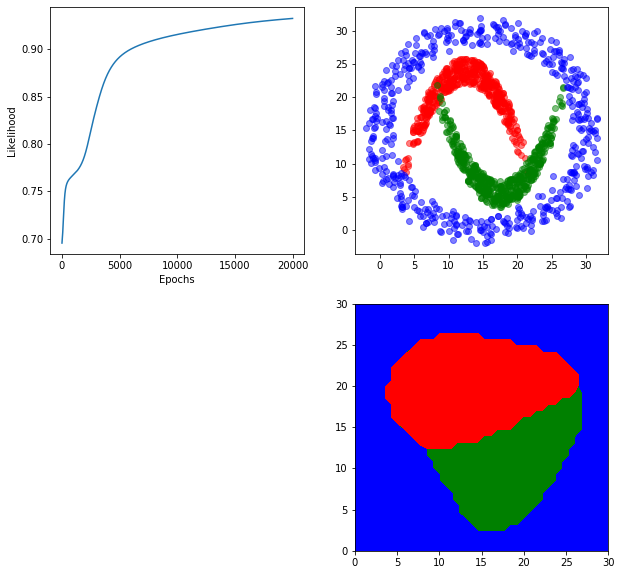

In [5]:
import neuralnetworks as nn
import mpl_toolkits.mplot3d as plt3
from matplotlib import cm

## if you edit neuralnetwork.py, force ipython to reload it by doing this.
# from imp import reload
# reload(nn)

nHidden = [5]
nnet = nn.NeuralNetworkClassifier(2, nHidden, 3) # 3 classes, will actually make 2-unit output layer
nnet.train(X, T, n_epochs=20000,  learning_rate=0.1)

xs = np.linspace(0, 30, 40)
x, y = np.meshgrid(xs, xs)
Xtest = np.vstack((x.flat, y.flat)).T
Ytest = nnet.use(Xtest)
predTest, probs = nnet.use(Xtest)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(nnet.error_trace)
plt.xlabel("Epochs")
plt.ylabel("Likelihood")

# plt.subplot(2, 2, 3)
# nnet.draw()

colors = ['red', 'green', 'blue']
plt.subplot(2, 2, 2)

for c in range(1, 4):
    mask = (T == c).flatten()
    plt.plot(X[mask, 0], X[mask, 1], 'o', markersize=6,  alpha=0.5,  color=colors[c-1])

plt.subplot(2, 2, 4)
plt.contourf(Xtest[:, 0].reshape((40, 40)), Xtest[:, 1].reshape((40, 40)),  predTest.reshape((40, 40)), 
             levels = [0.5, 1.99, 2.01, 3.5],  #    levels=(0.5, 1.5, 2.5, 3.5), 
             colors=('red', 'green', 'blue'));

In [6]:
from matplotlib.colors import LightSource

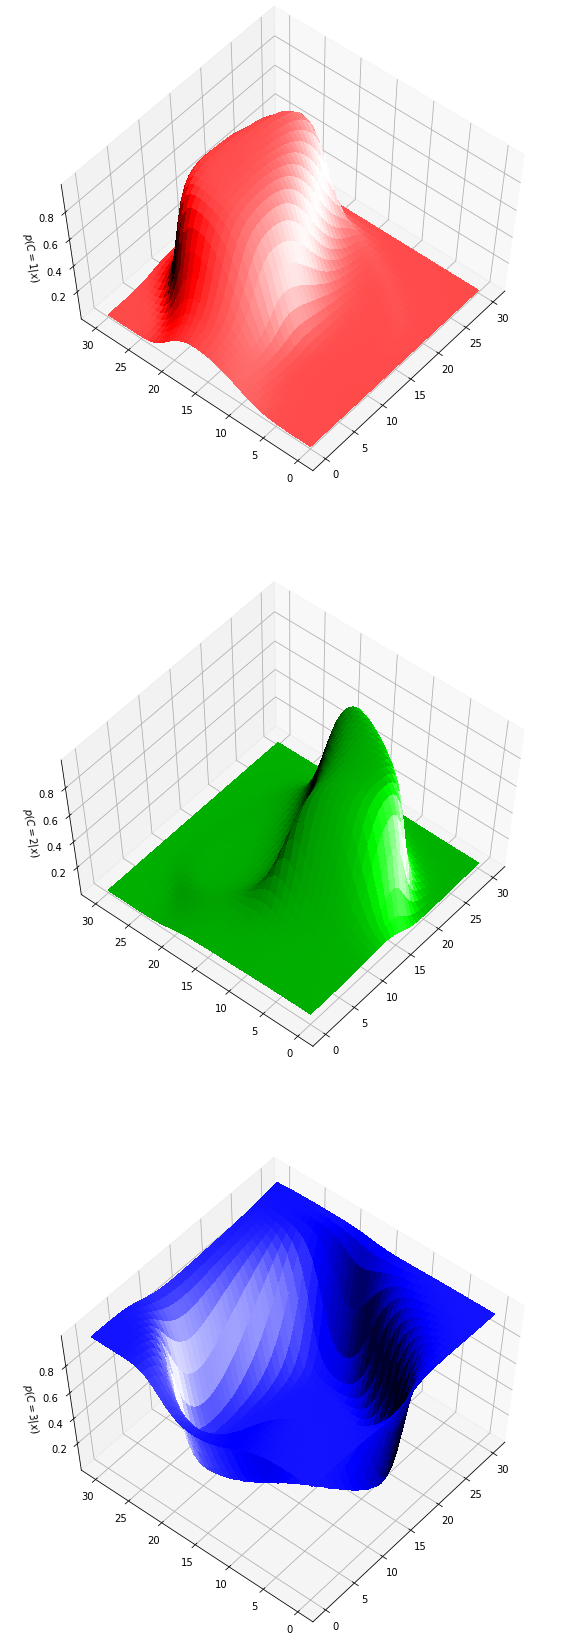

In [7]:
fig = plt.figure(figsize=(10, 30))
ls = LightSource(azdeg=30,  altdeg=60)
white = np.ones((x.shape[0],  x.shape[1],  3))
red = white * np.array([1, 0, 0])
green = white * np.array([0, 1, 0])
blue = white * np.array([0, 0, 1])
colors = [red,  green,  blue]

for c in range(3):
    ax = fig.add_subplot(3, 1, c+1, projection='3d')
    ax.view_init(azim = 180+40, elev = 60)
    Z = probs[:,  c].reshape(x.shape)
    rgb = ls.shade_rgb(colors[c],  Z,  vert_exag=0.1)
    ax.plot_surface(x, y, Z, 
                    rstride=1, cstride=1, linewidth=0,  antialiased=False, 
                    shade=False,  facecolors=rgb)
    ax.set_zlabel(r"$p(C="+str(c+1)+"|x)$")

How would you plot the outputs of the hidden units?

Let's repeat the experiment with classifying human activity data ([accelerometers.npy](https://www.cs.colostate.edu/~anderson/cs445/notebooks/accelerometers.npy)),  but now use our *NeuralNetworkClassifier* class to do nonlinear logistic regression.  This time we will retrieve and load *accelerometers.npy*,  a file containing a *numpy* array stored in its binary format.

In [8]:
data = np.load('accelerometers.npy')

In [9]:
data.shape

(225006, 4)

In [10]:
data[0, :]

array([ 1.        , -0.87313405, -0.08552787, -0.29504612])

In [11]:
X = data[:, 1:]
T = data[:, 0:1]
X.shape,  T.shape

((225006, 3), (225006, 1))

In [12]:
def generate_k_fold_cross_validation_sets(X, T, n_folds, shuffle=True):

    if shuffle:
        # Randomly order X and T
        randorder = np.arange(X.shape[0])
        np.random.shuffle(randorder)
        X = X[randorder, :]
        T = T[randorder, :]

    # Partition X and T into folds
    n_samples = X.shape[0]
    n_per_fold = round(n_samples / n_folds)
    n_last_fold = n_samples - n_per_fold * (n_folds - 1)

    folds = []
    start = 0
    for foldi in range(n_folds-1):
        folds.append( (X[start:start + n_per_fold, :], T[start:start + n_per_fold, :]) )
        start += n_per_fold
    folds.append( (X[start:, :], T[start:, :]) )

    # Yield k(k-1) assignments of Xtrain, Train, Xvalidate, Tvalidate, Xtest, Ttest

    for validation_i in range(n_folds):
        for test_i in range(n_folds):
            if test_i == validation_i:
                continue

            train_i = np.setdiff1d(range(n_folds), [validation_i, test_i])

            Xvalidate, Tvalidate = folds[validation_i]
            Xtest, Ttest = folds[test_i]
            if len(train_i) > 1:
                Xtrain = np.vstack([folds[i][0] for i in train_i])
                Ttrain = np.vstack([folds[i][1] for i in train_i])
            else:
                Xtrain, Ttrain = folds[train_i[0]]

            yield Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest

In [13]:
X.shape

(225006, 3)

In [14]:
def times2():
    for i in range(10):
        yield i * 2

In [15]:
list(times2())

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [16]:
z = times2()
z

<generator object times2 at 0x7f91334946d0>

In [17]:
next(z)

0

In [18]:
next(z)

2

In [19]:
Xtrain,  Ttrain,  Xval, Tval, Xtest,  Ttest = next(generate_k_fold_cross_validation_sets(X,  T,  n_folds=3))

In [20]:
Xtrain.shape, Ttrain.shape, Xval.shape, Tval.shape, Xtest.shape, Ttest.shape

((75002, 3), (75002, 1), (75002, 3), (75002, 1), (75002, 3), (75002, 1))

In [21]:
np.unique(Ttrain,  return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([7438, 7511, 7579, 7505, 7457, 7533, 7525, 7551, 7449, 7454]))

We can control how many digits after the decimal point are printed for `numpy.array` values.

In [22]:
%precision 5

'%.5f'

In [23]:
values, counts = np.unique(Ttrain,  return_counts=True)
counts / Ttrain.shape[0]

array([0.09917, 0.10014, 0.10105, 0.10006, 0.09942, 0.10044, 0.10033,
       0.10068, 0.09932, 0.09938])

In [24]:
values, counts = np.unique(Tval,  return_counts=True)
counts / Tval.shape[0]

array([0.10064, 0.10025, 0.0989 , 0.10046, 0.09906, 0.09988, 0.09948,
       0.09986, 0.10102, 0.10044])

In [25]:
values, counts = np.unique(Ttest,  return_counts=True)
counts / Ttest.shape[0]

array([0.10021, 0.0996 , 0.10004, 0.09946, 0.1015 , 0.0997 , 0.10018,
       0.09945, 0.09968, 0.10017])

Adam: Epoch 10 Error=0.82802
Adam: Epoch 20 Error=0.84288
Adam: Epoch 30 Error=0.85516
Adam: Epoch 40 Error=0.85977
Adam: Epoch 50 Error=0.86303
Adam: Epoch 60 Error=0.86533
Adam: Epoch 70 Error=0.86692
Adam: Epoch 80 Error=0.86838
Adam: Epoch 90 Error=0.86968
Adam: Epoch 100 Error=0.87069
Training took 8.751801490783691 seconds.


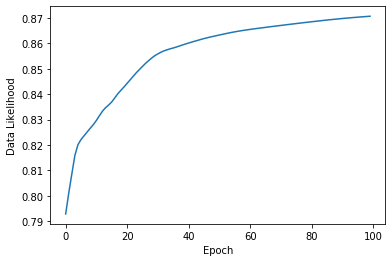

In [26]:
import time

n_classes = len(np.unique(T))

start_time = time.time()

nnet = nn.NeuralNetworkClassifier(X.shape[1], [10],  n_classes) 
nnet.train(Xtrain, Ttrain, n_epochs=100, learning_rate=0.1, method='adam')

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time} seconds.')

plt.plot(nnet.error_trace)
plt.xlabel('Epoch')
plt.ylabel('Data Likelihood');

For classification problems, we would like to see the percent of samples from each class that are classified corectly.  It is also revealing to see to which classes the misclassified samples are assigned.

This is typically called a *Confusion Matrix*.  This is a table of classification percents for all pairs of target classes and predicted classes.  A row of the confusion matrix corresponds to a target class, and the columns are the predicted classes.  So, the diagonal shows the percent of samples that are correctly classified for each target class.

In [27]:
Classes, Probs = nnet.use(Xtrain)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Ttrain == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
table

[[96.28932508738909,
  0.13444474321054048,
  1.3444474321054047,
  0.013444474321054048,
  2.016671148158107,
  0.0,
  0.0,
  0.06722237160527024,
  0.13444474321054048,
  0.0],
 [17.747303954200504,
  48.422313939555316,
  21.155638397017707,
  2.289974703767807,
  3.8210624417520966,
  0.03994141925176408,
  0.053255225669018774,
  1.9704433497536946,
  0.6257489016109705,
  3.8743176674211157],
 [4.182609842987201,
  3.6680300831244224,
  70.2599287504948,
  3.351365615516559,
  4.0770550204512475,
  2.8103971500197917,
  2.4937326824119275,
  3.7735849056603774,
  0.8180498746536482,
  4.565246074680037],
 [5.2098600932711525,
  5.169886742171886,
  24.290473017988006,
  12.818121252498335,
  12.151898734177214,
  11.912058627581612,
  5.902731512325117,
  7.075283144570286,
  5.9427048634243835,
  9.526982011992006],
 [10.500201153278798,
  6.70510929328148,
  12.189888695185731,
  2.2260962853694517,
  37.2938178892316,
  1.3276116400697333,
  1.783559072012874,
  9.574896070805

Of course, this is easier to read as a `pandas.DataFrame`.

In [28]:
class_names = ('1-Rest', '2-Coloring', '3-Legos', '4-Wii Tennis', '5-Wii Boxing', '6-0.75m/s',
               '7-1.25m/s', '8-1.75m/s', '9-2.25m/s', '10-Stairs')
class_names

('1-Rest',
 '2-Coloring',
 '3-Legos',
 '4-Wii Tennis',
 '5-Wii Boxing',
 '6-0.75m/s',
 '7-1.25m/s',
 '8-1.75m/s',
 '9-2.25m/s',
 '10-Stairs')

In [29]:
import pandas
conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.289325,0.134445,1.344447,0.013444,2.016671,0.000000,0.000000,0.067222,0.134445,0.000000
2-Coloring,17.747304,48.422314,21.155638,2.289975,3.821062,0.039941,0.053255,1.970443,0.625749,3.874318
3-Legos,4.182610,3.668030,70.259929,3.351366,4.077055,2.810397,2.493733,3.773585,0.818050,4.565246
4-Wii Tennis,5.209860,5.169887,24.290473,12.818121,12.151899,11.912059,5.902732,7.075283,5.942705,9.526982
5-Wii Boxing,10.500201,6.705109,12.189889,2.226096,37.293818,1.327612,1.783559,9.574896,14.576908,3.821912
6-0.75m/s,0.106199,0.026550,0.265498,0.238949,0.053100,83.711669,12.239480,0.703571,0.199124,2.455861
7-1.25m/s,0.039867,0.053156,0.770764,0.385382,0.053156,47.574751,43.534884,1.647841,0.132890,5.807309
8-1.75m/s,0.662164,2.052708,7.442723,2.357304,8.290293,2.065952,3.456496,39.491458,29.863594,4.317309
9-2.25m/s,0.295342,1.449859,5.410122,1.664653,9.397235,1.919721,2.403007,34.098537,39.871124,3.490401
10-Stairs,0.402468,3.005098,15.830427,7.043198,3.072176,20.753958,17.762275,7.620070,5.044272,19.466058


Time for some more `pandas` wizardry.  Help on the many options is available at [this Towards Data Science post](https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0) and [this documentation on Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html).

In [30]:
conf_matrix.style.format("{:.1f} %")

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.3 %,0.1 %,1.3 %,0.0 %,2.0 %,0.0 %,0.0 %,0.1 %,0.1 %,0.0 %
2-Coloring,17.7 %,48.4 %,21.2 %,2.3 %,3.8 %,0.0 %,0.1 %,2.0 %,0.6 %,3.9 %
3-Legos,4.2 %,3.7 %,70.3 %,3.4 %,4.1 %,2.8 %,2.5 %,3.8 %,0.8 %,4.6 %
4-Wii Tennis,5.2 %,5.2 %,24.3 %,12.8 %,12.2 %,11.9 %,5.9 %,7.1 %,5.9 %,9.5 %
5-Wii Boxing,10.5 %,6.7 %,12.2 %,2.2 %,37.3 %,1.3 %,1.8 %,9.6 %,14.6 %,3.8 %
6-0.75m/s,0.1 %,0.0 %,0.3 %,0.2 %,0.1 %,83.7 %,12.2 %,0.7 %,0.2 %,2.5 %
7-1.25m/s,0.0 %,0.1 %,0.8 %,0.4 %,0.1 %,47.6 %,43.5 %,1.6 %,0.1 %,5.8 %
8-1.75m/s,0.7 %,2.1 %,7.4 %,2.4 %,8.3 %,2.1 %,3.5 %,39.5 %,29.9 %,4.3 %
9-2.25m/s,0.3 %,1.4 %,5.4 %,1.7 %,9.4 %,1.9 %,2.4 %,34.1 %,39.9 %,3.5 %
10-Stairs,0.4 %,3.0 %,15.8 %,7.0 %,3.1 %,20.8 %,17.8 %,7.6 %,5.0 %,19.5 %


The above function call does not save the style in `conf_matrix`.

In [31]:
conf_matrix

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.289325,0.134445,1.344447,0.013444,2.016671,0.000000,0.000000,0.067222,0.134445,0.000000
2-Coloring,17.747304,48.422314,21.155638,2.289975,3.821062,0.039941,0.053255,1.970443,0.625749,3.874318
3-Legos,4.182610,3.668030,70.259929,3.351366,4.077055,2.810397,2.493733,3.773585,0.818050,4.565246
4-Wii Tennis,5.209860,5.169887,24.290473,12.818121,12.151899,11.912059,5.902732,7.075283,5.942705,9.526982
5-Wii Boxing,10.500201,6.705109,12.189889,2.226096,37.293818,1.327612,1.783559,9.574896,14.576908,3.821912
6-0.75m/s,0.106199,0.026550,0.265498,0.238949,0.053100,83.711669,12.239480,0.703571,0.199124,2.455861
7-1.25m/s,0.039867,0.053156,0.770764,0.385382,0.053156,47.574751,43.534884,1.647841,0.132890,5.807309
8-1.75m/s,0.662164,2.052708,7.442723,2.357304,8.290293,2.065952,3.456496,39.491458,29.863594,4.317309
9-2.25m/s,0.295342,1.449859,5.410122,1.664653,9.397235,1.919721,2.403007,34.098537,39.871124,3.490401
10-Stairs,0.402468,3.005098,15.830427,7.043198,3.072176,20.753958,17.762275,7.620070,5.044272,19.466058


We can add colored backgrounds to provide quick visual comparison.

In [32]:
conf_matrix.style.background_gradient(cmap='Blues')

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.289325,0.134445,1.344447,0.013444,2.016671,0.000000,0.000000,0.067222,0.134445,0.000000
2-Coloring,17.747304,48.422314,21.155638,2.289975,3.821062,0.039941,0.053255,1.970443,0.625749,3.874318
3-Legos,4.182610,3.668030,70.259929,3.351366,4.077055,2.810397,2.493733,3.773585,0.818050,4.565246
4-Wii Tennis,5.209860,5.169887,24.290473,12.818121,12.151899,11.912059,5.902732,7.075283,5.942705,9.526982
5-Wii Boxing,10.500201,6.705109,12.189889,2.226096,37.293818,1.327612,1.783559,9.574896,14.576908,3.821912
6-0.75m/s,0.106199,0.026550,0.265498,0.238949,0.053100,83.711669,12.239480,0.703571,0.199124,2.455861
7-1.25m/s,0.039867,0.053156,0.770764,0.385382,0.053156,47.574751,43.534884,1.647841,0.132890,5.807309
8-1.75m/s,0.662164,2.052708,7.442723,2.357304,8.290293,2.065952,3.456496,39.491458,29.863594,4.317309
9-2.25m/s,0.295342,1.449859,5.410122,1.664653,9.397235,1.919721,2.403007,34.098537,39.871124,3.490401
10-Stairs,0.402468,3.005098,15.830427,7.043198,3.072176,20.753958,17.762275,7.620070,5.044272,19.466058


And combine these two styles by applying multiple styles in object-oriented fashion.

In [33]:
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.3 %,0.1 %,1.3 %,0.0 %,2.0 %,0.0 %,0.0 %,0.1 %,0.1 %,0.0 %
2-Coloring,17.7 %,48.4 %,21.2 %,2.3 %,3.8 %,0.0 %,0.1 %,2.0 %,0.6 %,3.9 %
3-Legos,4.2 %,3.7 %,70.3 %,3.4 %,4.1 %,2.8 %,2.5 %,3.8 %,0.8 %,4.6 %
4-Wii Tennis,5.2 %,5.2 %,24.3 %,12.8 %,12.2 %,11.9 %,5.9 %,7.1 %,5.9 %,9.5 %
5-Wii Boxing,10.5 %,6.7 %,12.2 %,2.2 %,37.3 %,1.3 %,1.8 %,9.6 %,14.6 %,3.8 %
6-0.75m/s,0.1 %,0.0 %,0.3 %,0.2 %,0.1 %,83.7 %,12.2 %,0.7 %,0.2 %,2.5 %
7-1.25m/s,0.0 %,0.1 %,0.8 %,0.4 %,0.1 %,47.6 %,43.5 %,1.6 %,0.1 %,5.8 %
8-1.75m/s,0.7 %,2.1 %,7.4 %,2.4 %,8.3 %,2.1 %,3.5 %,39.5 %,29.9 %,4.3 %
9-2.25m/s,0.3 %,1.4 %,5.4 %,1.7 %,9.4 %,1.9 %,2.4 %,34.1 %,39.9 %,3.5 %
10-Stairs,0.4 %,3.0 %,15.8 %,7.0 %,3.1 %,20.8 %,17.8 %,7.6 %,5.0 %,19.5 %


Okay.  Let's try a bigger network.  Maybe we can increase some of those accuracies along the diagonal.

Adam: Epoch 100 Error=0.88669
Adam: Epoch 200 Error=0.89088
Adam: Epoch 300 Error=0.89096
Adam: Epoch 400 Error=0.88240
Adam: Epoch 500 Error=0.89376
Adam: Epoch 600 Error=0.89512
Adam: Epoch 700 Error=0.88988
Adam: Epoch 800 Error=0.89511
Adam: Epoch 900 Error=0.89590
Adam: Epoch 1000 Error=0.86547
Training took 553.6346580982208 seconds.


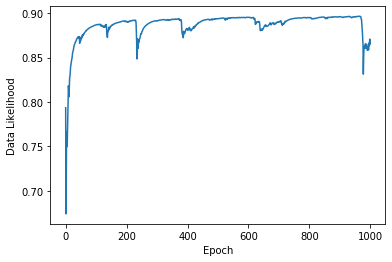

In [34]:
start_time = time.time()

nnet = nn.NeuralNetworkClassifier(X.shape[1], [100, 50],  n_classes) 
nnet.train(Xtrain, Ttrain, n_epochs=1000, learning_rate=0.1, method='adam')

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time} seconds.')

plt.plot(nnet.error_trace)
plt.xlabel('Epoch')
plt.ylabel('Data Likelihood');

In [35]:
Classes, Probs = nnet.use(Xtrain)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Ttrain == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
    
print(f'Train percent correct {np.mean(Classes == Ttrain) * 100:.2f}') 

conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

Train percent correct 46.55


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,54.8 %,42.9 %,0.1 %,1.8 %,0.0 %,0.0 %,0.0 %,0.0 %,0.3 %,0.0 %
2-Coloring,9.0 %,73.6 %,5.0 %,4.0 %,1.1 %,0.0 %,0.1 %,0.0 %,5.6 %,1.5 %
3-Legos,10.2 %,3.9 %,53.4 %,15.9 %,0.4 %,2.2 %,1.0 %,0.7 %,2.8 %,9.5 %
4-Wii Tennis,7.0 %,5.4 %,14.8 %,24.3 %,2.8 %,7.9 %,2.6 %,2.6 %,9.4 %,23.3 %
5-Wii Boxing,12.3 %,6.3 %,6.6 %,18.5 %,25.4 %,0.9 %,0.6 %,6.1 %,16.5 %,6.8 %
6-0.75m/s,0.1 %,0.1 %,0.2 %,0.5 %,0.0 %,77.8 %,7.0 %,0.2 %,0.8 %,13.2 %
7-1.25m/s,0.0 %,0.2 %,0.6 %,1.3 %,0.1 %,41.2 %,35.7 %,0.6 %,1.0 %,19.1 %
8-1.75m/s,1.4 %,0.6 %,4.2 %,9.1 %,4.3 %,1.6 %,2.5 %,22.8 %,43.8 %,9.8 %
9-2.25m/s,0.7 %,0.6 %,3.6 %,7.3 %,6.1 %,1.7 %,1.5 %,18.7 %,53.6 %,6.1 %
10-Stairs,0.4 %,3.4 %,9.1 %,7.7 %,2.1 %,13.8 %,9.9 %,3.2 %,6.5 %,43.9 %


Now let's check the validationa and test sets.

In [36]:
Classes, Probs = nnet.use(Xval)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Tval == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)

print(f'Val percent correct {np.mean(Classes == Tval) * 100:.2f}') 

conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

Val percent correct 46.79


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,55.4 %,42.3 %,0.1 %,1.9 %,0.0 %,0.0 %,0.0 %,0.0 %,0.3 %,0.0 %
2-Coloring,9.6 %,73.6 %,5.2 %,3.5 %,1.4 %,0.0 %,0.1 %,0.0 %,4.9 %,1.7 %
3-Legos,10.8 %,4.6 %,52.8 %,15.5 %,0.5 %,2.0 %,1.0 %,0.9 %,2.7 %,9.4 %
4-Wii Tennis,6.3 %,6.1 %,14.3 %,24.4 %,3.1 %,8.2 %,2.8 %,2.4 %,8.8 %,23.6 %
5-Wii Boxing,12.0 %,6.7 %,6.3 %,18.4 %,26.0 %,0.8 %,1.0 %,6.3 %,16.4 %,6.0 %
6-0.75m/s,0.1 %,0.1 %,0.3 %,0.5 %,0.1 %,78.3 %,7.5 %,0.1 %,0.7 %,12.3 %
7-1.25m/s,0.0 %,0.1 %,0.7 %,1.2 %,0.1 %,40.9 %,36.2 %,0.5 %,0.9 %,19.4 %
8-1.75m/s,1.3 %,0.9 %,4.3 %,8.8 %,4.3 %,1.6 %,2.4 %,23.2 %,43.3 %,9.9 %
9-2.25m/s,0.8 %,0.5 %,3.3 %,7.0 %,6.3 %,1.6 %,1.4 %,19.1 %,54.2 %,5.8 %
10-Stairs,0.3 %,3.3 %,9.2 %,7.3 %,2.2 %,14.2 %,10.4 %,3.1 %,6.2 %,43.7 %


In [37]:
Classes, Probs = nnet.use(Xtest)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Ttest == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
    
print(f'Test percent correct {np.mean(Classes == Ttest) * 100:.2f}') 

conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

Test percent correct 46.27


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,55.1 %,42.4 %,0.1 %,2.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.3 %,0.0 %
2-Coloring,9.1 %,73.8 %,5.0 %,3.5 %,1.3 %,0.0 %,0.0 %,0.0 %,5.2 %,2.1 %
3-Legos,10.0 %,4.2 %,52.2 %,17.0 %,0.3 %,2.1 %,1.1 %,0.8 %,2.7 %,9.6 %
4-Wii Tennis,6.8 %,5.9 %,15.0 %,23.9 %,2.9 %,9.3 %,2.7 %,2.6 %,8.7 %,22.3 %
5-Wii Boxing,11.4 %,7.1 %,6.3 %,18.3 %,25.8 %,1.1 %,0.6 %,6.4 %,16.6 %,6.4 %
6-0.75m/s,0.1 %,0.1 %,0.3 %,0.7 %,0.1 %,77.5 %,7.6 %,0.3 %,0.7 %,12.6 %
7-1.25m/s,0.0 %,0.3 %,0.5 %,1.4 %,0.1 %,40.5 %,35.9 %,0.4 %,1.1 %,19.7 %
8-1.75m/s,1.3 %,0.6 %,4.5 %,8.7 %,4.2 %,1.6 %,2.3 %,23.0 %,44.2 %,9.6 %
9-2.25m/s,0.9 %,0.6 %,3.0 %,7.1 %,6.7 %,1.4 %,1.5 %,19.6 %,53.0 %,6.3 %
10-Stairs,0.6 %,3.6 %,9.1 %,8.4 %,2.2 %,14.1 %,9.8 %,3.0 %,6.4 %,42.8 %


What about a different data representation, maybe one involving frequencies to represent movement?

One such representation is based on the [continuous wavelet transform](https://en.wikipedia.org/wiki/Continuous_wavelet_transform), or cwt.  Here is some code that applies a cwt to our accelerometer data.

In [38]:
import scipy.signal as sig

def cwt(eeg, Fs, freqs, width, channelNames=None, graphics=False):
    if freqs.min() == 0:
        print('cwt: Frequencies must be greater than 0.')
        return None, None
    nChannels, nSamples = eeg.shape
    if not channelNames and graphics:
        channelNames = [f'Channel {i:2d}' for i in range(nChannels)]

    nFreqs = len(freqs)
    tfrep = np.zeros((nChannels,  nFreqs, nSamples))
    tfrepPhase = np.zeros((nChannels, nFreqs, nSamples))

    for ch in range(nChannels):
        print('channel', ch, ' freq ', end='')
        for freqi in range(nFreqs):
            print(freqs[freqi], ' ', end='')
            mag, phase = energyvec(freqs[freqi], eeg[ch, :], Fs, width)
            tfrepPhase[ch, freqi, :] = phase
            tfrep[ch, freqi, :] = mag
        print()

    return tfrep, tfrepPhase

def morletLength(Fs, f, width):
  ''' len = morletLength(Fs, f, width) '''
  dt = 1.0/Fs
  sf = f/width
  st = 1.0/(2*np.pi*sf)
  return int((3.5*st - -3.5*st)/dt)

def energyvec(f, s, Fs, width):
  '''
  function [y, phase] <- energyvec(f, s, Fs, width)
  function y <- energyvec(f, s, Fs, width)

  Return a vector containing the energy as a
  function of time for frequency f. The energy
  is calculated using Morlet''s wavelets.
  s : signal
  Fs: sampling frequency
  width : width of Morlet wavelet (><- 5 suggested).
  '''

  dt = 1.0 / Fs
  sf = f / width
  st = 1.0 / (2 * np.pi * sf)

  t = np.arange(-3.5 * st, 3.5 * st, step=dt)
  m = morlet(f, t, width)
  # yconv = np.convolve(s, m, mode="same")
  yconv = sig.fftconvolve(s, m, mode='same')

  lengthMorlet = len(m)
  firsthalf = int(lengthMorlet / 2.0 + 0.5)
  secondhalf = lengthMorlet - firsthalf

  padtotal = len(s) - len(yconv)
  padfront = int(padtotal / 2.0 + 0.5)
  padback = padtotal - padfront
  yconvNoBoundary = yconv
  y = np.abs(yconvNoBoundary)**2
  phase = np.angle(yconvNoBoundary, deg=True)
  return y, phase

######################################################################
      
def morlet(f, t, width):
    '''
    function y <- morlet(f, t, width)
    Morlet''s wavelet for frequency f and time t.
    The wavelet will be normalized so the total energy is 1.
    width defines the width of the wavelet.
    A value ><- 5 is suggested.

    Ref: Tallon-Baudry et al., J. Neurosci. 15, 722-734 (1997), page 724

    Ole Jensen, August 1998
    '''
    sf = f / width
    st = 1.0 / (2 * np.pi * sf)
    A = 1.0 / np.sqrt(st * np.sqrt(2 * np.pi))
    y = A * np.exp(-t ** 2 / (2 * st ** 2)) * np.exp(1j * 2 * np.pi * f * t)
    return y

In [39]:
width = 75 
maxFreq = 20
freqs = np.arange(0.5, maxFreq, 0.5) # makes same freqs used in stft above
start_time = time.time()
tfrep, tfrepPhase = cwt(data[:, 1:].T,  75,  freqs,  width)
elapsed = time.time() - start_time
print(f'CWT time: {elapsed} seconds')

channel 0  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 1  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 2  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
CWT time: 4.003356218338013 seconds


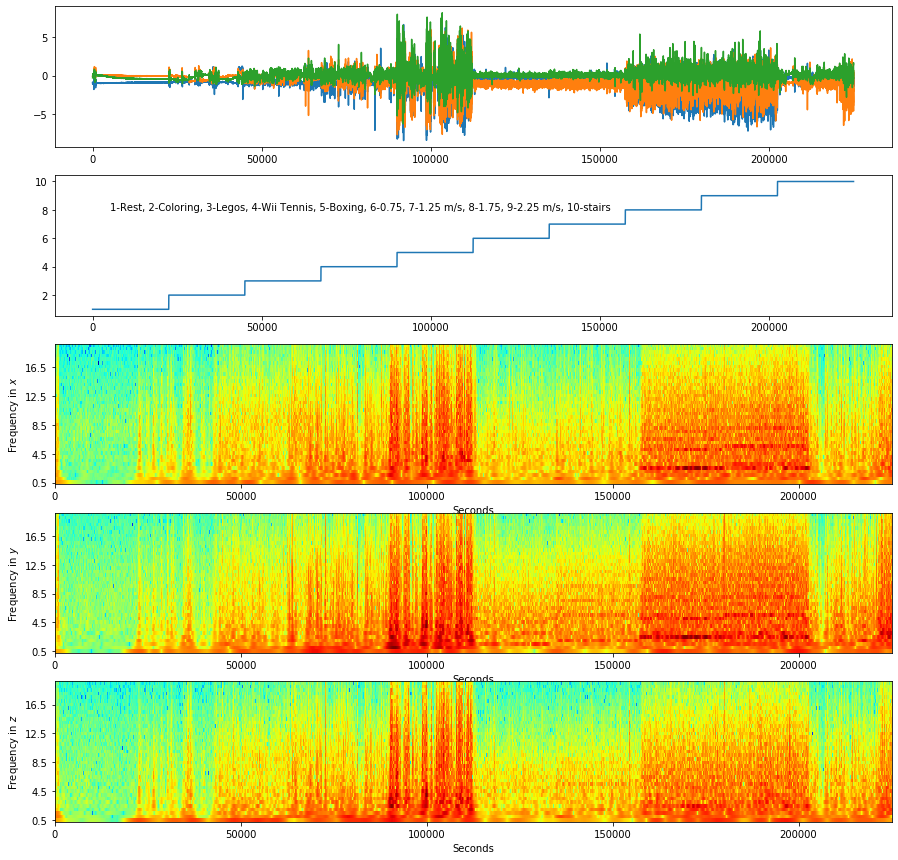

In [40]:
plt.figure(figsize=(15, 15))
plt.subplot(5, 1, 1)
plt.plot(data[:, 1:])
plt.axis('tight')

plt.subplot(5, 1, 2)
plt.plot(data[:, 0])
plt.text(5000, 8, '1-Rest, 2-Coloring, 3-Legos, 4-Wii Tennis, 5-Boxing, 6-0.75, 7-1.25 m/s, 8-1.75, 9-2.25 m/s, 10-stairs')
plt.axis('tight')

nSensors = data.shape[1] - 1
for i in range(nSensors):
    plt.subplot(5, 1, i+3)
    # Make a colored image of the logarithm of the CWT.
    plt.imshow(np.log(tfrep[i, :, :]), 
               interpolation='nearest', origin='lower',
               cmap=plt.cm.jet) #plt.cm.Reds)
    plt.xlabel('Seconds')
    plt.ylabel('Frequency in ' + ('$x$', '$y$', '$z$')[i])
    tickstep = round(len(freqs) / 5)
    plt.yticks(np.arange(len(freqs))[::tickstep],
                   [str(i) for i in freqs[::tickstep]])
    plt.axis('auto')
    plt.axis('tight')

In [41]:
tfrep.shape

(3, 39, 225006)

In [42]:
X = tfrep.reshape((3 * 39, -1)).T
X.shape, T.shape, len(np.unique(T))

((225006, 117), (225006, 1), 10)

In [43]:
Xtrain, Ttrain, Xval, Tval, Xtest, Ttest = next(generate_k_fold_cross_validation_sets(X, T, 3))

In [44]:
print(Xtrain.shape)
start_time = time.time()
nnet = nn.NeuralNetworkClassifier(X.shape[1], [10], 10)  #10 classes 
nnet.train(Xtrain, Ttrain, n_epochs = 500, learning_rate=0.1, method='adam')
elapsed = time.time() - start_time
print(f'Training took {elapsed} seconds.')

(75002, 117)
Adam: Epoch 50 Error=0.95281
Adam: Epoch 100 Error=0.96648
Adam: Epoch 150 Error=0.97562
Adam: Epoch 200 Error=0.98087
Adam: Epoch 250 Error=0.98470
Adam: Epoch 300 Error=0.98643
Adam: Epoch 350 Error=0.98514
Adam: Epoch 400 Error=0.88810
Adam: Epoch 450 Error=0.97366
Adam: Epoch 500 Error=0.97969
Training took 124.5467426776886 seconds.


In [46]:
Classes, Probs = nnet.use(Xtest)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Ttest == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
    
print(f'Test percent correct {np.mean(Classes == Ttest) * 100:.2f}') 

conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

Test percent correct 92.83


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,88.2 %,11.8 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %
2-Coloring,13.9 %,75.6 %,9.8 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.6 %
3-Legos,0.0 %,3.8 %,86.6 %,0.0 %,0.0 %,0.0 %,0.9 %,0.0 %,0.0 %,8.6 %
4-Wii Tennis,0.0 %,0.0 %,0.0 %,99.6 %,0.4 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %
5-Wii Boxing,0.0 %,0.0 %,0.0 %,0.0 %,99.9 %,0.0 %,0.1 %,0.0 %,0.0 %,0.0 %
6-0.75m/s,0.1 %,1.1 %,0.0 %,0.0 %,0.6 %,95.9 %,0.0 %,0.1 %,0.0 %,2.1 %
7-1.25m/s,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,2.0 %,95.8 %,0.0 %,0.0 %,2.2 %
8-1.75m/s,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,99.6 %,0.3 %,0.0 %
9-2.25m/s,0.0 %,0.0 %,0.0 %,0.0 %,0.3 %,0.1 %,0.0 %,0.3 %,99.3 %,0.0 %
10-Stairs,0.0 %,6.4 %,4.8 %,0.0 %,0.2 %,1.0 %,0.0 %,0.0 %,0.0 %,87.5 %
